<a href="https://colab.research.google.com/github/ayadinaila/Data-visualisation/blob/main/checkpoint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


# ***importing the data***

In [429]:
path=pd.read_csv("/content/titanic-passengers (1).csv",sep=';')
path


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


# visualisation of the data 

In [430]:
path.head

<bound method NDFrame.head of      PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]>

In [431]:
path.info

<bound method DataFrame.info of      PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]>

In [432]:
path.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [433]:
path.dropna(how = "any",inplace= True)
path.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 881
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    object 
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 18.6+ KB


In [434]:
path.fillna(0)
path

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,Yes,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
863,858,Yes,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
865,196,Yes,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
875,463,No,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [435]:
path.dtypes


PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [436]:
path.shape

(183, 12)

In [437]:
path.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [438]:
path.isnull().sum().sum()

0

In [439]:
path.Survived

1       No
4       No
16      No
19     Yes
26     Yes
      ... 
862    Yes
863    Yes
865    Yes
875     No
881     No
Name: Survived, Length: 183, dtype: object

In [440]:
path["Survived"].value_counts()


Yes    123
No      60
Name: Survived, dtype: int64

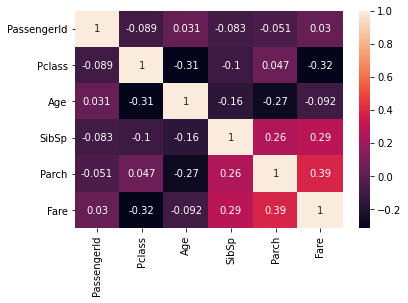

In [441]:
corr = path.corr()
sns.heatmap(corr, annot = True)

***apply logistic regression***

In [442]:
#preparing data for logistic regression
path["Survived"]=path["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
path['Sex'].replace(["male","female"], [1,0], inplace=True)
path.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,0,1,"Widener, Mr. Harry Elkins",1,27.0,0,2,113503,211.5000,C82,C
19,225,1,1,"Hoyt, Mr. Frederick Maxfield",1,38.0,1,0,19943,90.0000,C93,S
26,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",1,60.0,1,1,13567,79.2000,B41,C
33,537,0,1,"Butt, Major. Archibald Willingham",1,45.0,0,0,113050,26.5500,B38,S
37,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",1,28.0,0,0,110564,26.5500,C52,S
59,453,0,1,"Foreman, Mr. Benjamin Laventall",1,30.0,0,0,113051,27.7500,C111,C
60,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",0,22.0,1,0,113776,66.6000,C2,S
63,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",0,27.0,0,0,34218,10.5000,E101,S


In [443]:
x = path[['PassengerId', 'Sex','Pclass']].values
y = path["Survived"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=20)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)  #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.70


In [444]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inp_df = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [445]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

# ***Use confusion matrix to validate the model.***

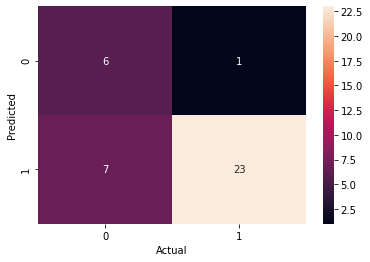

In [446]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)


# ***Another validation matrix for classification is ROC / AUC***

In [447]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       0.96      0.77      0.85        30

    accuracy                           0.78        37
   macro avg       0.71      0.81      0.73        37
weighted avg       0.86      0.78      0.80        37

